In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def add_layer(inputs, in_size, out_size, activation_function=None):
    #TODO:
    Weights = tf.Variable(tf.random_normal([in_size, out_size]))
    biases = tf.Variable(tf.zeros([1, out_size]) + 0.1)
    Wx_plus_b = tf.matmul(inputs, Weights) + biases
    if activation_function is None:
        outputs = Wx_plus_b
    else:
        outputs = activation_function(Wx_plus_b)
    return outputs

In [3]:
x_data = np.linspace(-1, 1, 300, dtype=np.float32)[:, np.newaxis]
noise = np.random.normal(0, 0.05, x_data.shape).astype(np.float32)
y_data = np.square(x_data) - 0.5 + noise

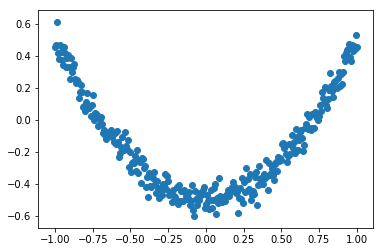

In [4]:
plt.scatter(x_data, y_data)
plt.show()

In [5]:
xs = tf.placeholder(tf.float32, [None, 1])
ys = tf.placeholder(tf.float32, [None, 1])

In [6]:
l1 = add_layer(xs, 1, 10, activation_function=tf.nn.relu)

In [7]:
prediction = add_layer(l1, 10, 1, activation_function=None)

In [8]:
loss = tf.reduce_mean(tf.reduce_sum(tf.square(ys-prediction), reduction_indices=[1]))
train_step = tf.train.GradientDescentOptimizer(0.1).minimize(loss)

In [9]:
sess = tf.Session()

In [11]:
init = tf.global_variables_initializer()
sess.run(init)

for i in range(1000):
    # training
    sess.run(train_step, feed_dict={xs: x_data, ys: y_data})
    if i % 50 == 0:
        # to see the step improvement
        print(sess.run(loss, feed_dict={xs: x_data, ys: y_data}))

0.242563
0.0136898
0.00760165
0.00531373
0.00443718
0.00399214
0.0037931
0.00368546
0.00361927
0.0035761
0.00353474
0.00348951
0.0034356
0.00338302
0.0033498
0.00332497
0.00330837
0.00329775
0.00328967
0.00328239


In [39]:
test_data = np.linspace(1, 2, 20, dtype=np.float32)[:, np.newaxis]
predict = sess.run(prediction, feed_dict={xs: test_data})

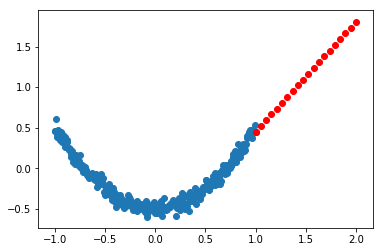

In [40]:
plt.scatter(x_data, y_data)
plt.scatter(test_data, predict, color='red')
plt.show()